In [1]:
import shap
import numpy as np

In [2]:
x_train=np.load("X_train.npy")
x_test=np.load("X_test.npy")
y_test=np.load("y_test.npy")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from six.moves import cPickle
import os
#import multiprocessing

import keras
import keras.backend.tensorflow_backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.engine.topology import Input
from keras.optimizers import Adam
from keras import regularizers
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using TensorFlow backend.


In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(22,24,1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", 
                 #data_format = "channels_first",
                 kernel_regularizer=regularizers.l2(0.01), 
                 #input_shape=(23,24,1),
                 padding='valid',
                 name="conv2d1"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid', 
                 #data_format = "channels_first",
                 name="maxpool2d1",
                 strides=(2,2)))
#model.add(Dropout(rate=0.1))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", 
                 kernel_regularizer=regularizers.l2(0.01),
                 padding='valid', 
                 #data_format = "channels_first",
                 name="conv2d2"))
#model.add(Conv2D(filters=256, kernel_size=(5, 5), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Flatten(
    #data_format = "channels_first", 
    name="flatten"))
#model.add(Dense(units=512, kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(rate=0.5))
#model.add(Dense(units=512, kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units=7, activation="softmax", name="preds"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('/gdrive/My Drive/workflow/periodic/code/experiments/cnn/model.h5')
model.load_weights('model.h5')
model.summary()

W0826 12:52:03.716707  4628 deprecation.py:506] From f:\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d1 (Conv2D)             (None, 18, 20, 16)        416       
_________________________________________________________________
maxpool2d1 (MaxPooling2D)    (None, 9, 10, 16)         0         
_________________________________________________________________
conv2d2 (Conv2D)             (None, 5, 6, 64)          25664     
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
preds (Dense)                (None, 7)                 13447     
Total params: 39,527
Trainable params: 39,527
Non-trainable params: 0
_________________________________________________________________


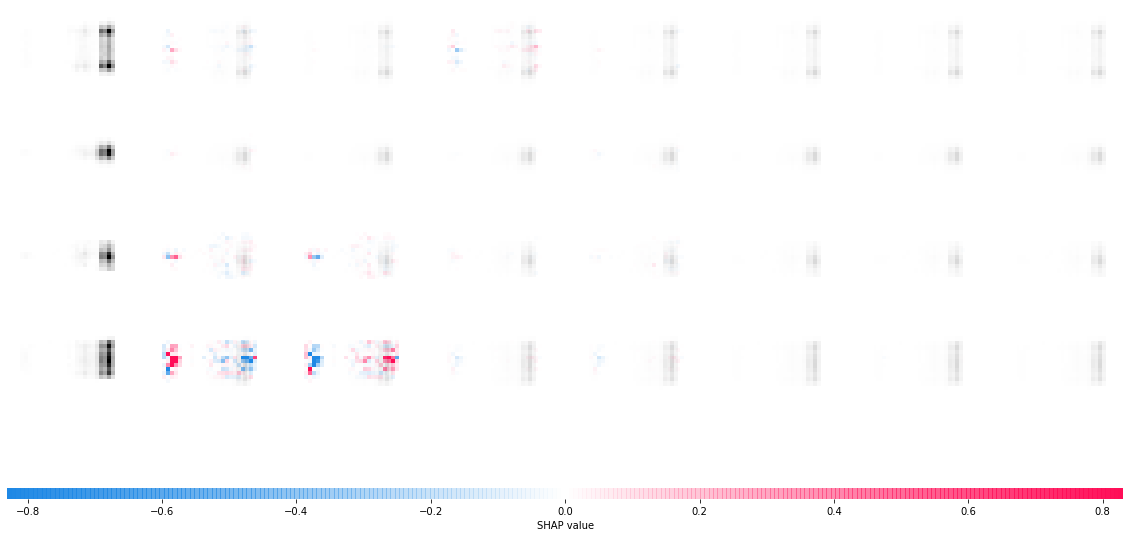

In [18]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[11:15])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[11:15])

In [19]:
y_test[11:15]

array([4, 1, 1, 1])

In [17]:
model.layers[-1]